In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [2]:
# Read input images and assign labels based on folder names
print(os.listdir(r"D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split"))

['test', 'train', 'validation']


In [3]:
SIZE = 256  # Resize images

In [4]:
# Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob(r"D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.*")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.stack((img,)*3, axis=-1)
        train_images.append(img)
        train_labels.append(label)

No PE
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\003cb92986eb.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\02a20344ee75.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\02ebdaf46820.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\03330a4fb67a.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\034fd9ef4433.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\0362beda1253.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\03792f0dc782.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\0400273c0886.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\044e557c988c.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\054c05350faa.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\2804100fc22c.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\2813aea35a7b.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\284fbddf615f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\2854577d97f3.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\285c0ac70bdc.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\287151346b83.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\287eb8da556f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\2884e2abbc72.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\28add32e3b85.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\293bad770619.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3cc70a1351c9.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3cef6e5b26b3.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3d1fbccd7e9c.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3d342e12f460.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3d6e4bac5531.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3d6f8b257385.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3ddeca375786.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3df32a91fd66.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3e5becddee33.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\3e7707b629e8.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5c11bf051e50.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5c4e636ad5e2.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5c7b5a59ae71.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5c92907cb597.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5d2b53ea2da2.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5d381298b43e.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5d4d6119a147.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5dfe30517ce4.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5e2f4f3ea4c0.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\5e7ad0df7396.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\7daa75f06b5d.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\7dceb4d303c7.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\7f45ca462f06.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\7f6f9144f371.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\7f9f445c4fd8.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\7fc7e43c889e.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\7ff21f506d6f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\809536a25e27.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\811ff981cdcb.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\815a8f624835.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\98411966f0a2.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\99100648bd5d.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\993d09bc1f14.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\9981399ffd58.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\999ce4849144.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\99fba280a340.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\9a774fb115e4.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\9ab6c93cba23.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\9adf9aad3478.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\9b11c788464f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b76c1a7c7a3c.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b7f11c18c7a4.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b7f42c09b688.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b7fec143e23b.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b828af315353.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b8977af7e20a.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b934f518be52.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b93de5c4a2d1.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b9a48d2f0163.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\b9a4a3bf09ec.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d2b4ab4e47b2.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d2b770c4d553.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d2c97a7a74fb.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d30fbf6174e7.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d31c54cf6168.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d32abde89ab4.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d3c072fe1d8a.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d3dc4e8b2646.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d4789cd06fbb.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\d4be1fd799b1.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\ec99bf062555.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\eca3ff1838e6.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\ed21a33b756f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\ed24dfa7850d.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\f005eac36b74.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\f0535e8a3eb2.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\f10a393b7e61.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\f253831982a7.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\f25dfc4fb704.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\No PE\f302d2349e1f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\P

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0159_f685406da751.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0160_3361db92d703.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0160_70b4b4dbdb9c.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0161_094f241d98ec.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0161_3bebe471ffb4.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0162_47c5a7c686d3.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0162_677ad4d22efb.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0163_0f70c88a09ff.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0163_b2d326883120.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE0164_30afcfd1cbbe.jpg


D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE17ff79a5c402.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE187f4d29cfcc.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE190fd51ff755.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE1abf074eb4c.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE1abf59765d3b.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE1adf2b0c645a.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE1bae502ebb16.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE1c9050b79fa5.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE1ca5b3ae5160.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE1cf7c2e1a8b3.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmo

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3b436780d468.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3bfbcedd8b6a.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3cf7adacd3bf.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3d7b378d40b4.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3de6e8070080.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3e631a89d1be.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3ed6ddae6e74.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3ee907801b6b.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3f02d933815a.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE3f27322d382f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmo

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE60de96f4ede3.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE611282eb30d2.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE612a8b0f9465.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE619f21faa5a0.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE61b00e15942b.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE61f6f5d96583.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE6218437bf9ae.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE625790eacd63.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE628eb5b4e8db.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE6296ffd4d16f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmona

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE886a835e547a.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE88809daed261.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE8899e290401a.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE88ba4e2658a.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE892e744bd644.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE8932a6656d1e.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE8943cb7f061.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE894e163e7ecc.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE89b7cf2bc57f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PE89e3ffa42344.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary 

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa7c1c1d54d75.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa7f69764ff08.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa7fa736206b.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa81b0760085b.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa84d5d3c7dc3.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa9725e2ff5ed.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa974f6ee765d.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa97c47e6080f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEa9a1ea61198.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEaacb44fc4cd5.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonar

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEcdc14779ab86.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEce272617e4f4.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEce72ab9d4ab4.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEcedf4c79e68f.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEcef0f36a062e.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEcf54d72e7fb2.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEcf8f9a508ba8.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEcfa272908ae1.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEcfa7dd462fdf.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEcfb136e6e122.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary

D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEe860b11c49e1.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEe8bcea4fffc3.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEe8e8525b9ec6.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEe8f39f9f20df.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEe9c2b64a51f2.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEea3087d0e97d.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEeb0dfdee0c03.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEeb0e80cdbdaa.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEebf155a801c2.jpg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\train\PE\PEecaed39e07af.jpeg
D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmon

In [5]:
len(train_images), len(train_labels)

(1664, 1664)

In [6]:
# Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
train_images.shape

(1664, 256, 256, 3)

In [8]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob(r"D:\M.Sc BDA\Sem_3\BD3P3_Research Paper\Pulmonary Embolism\PE_Split\validation\*"):
    val_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.*")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.stack((img,)*3, axis=-1)
        test_images.append(img)
        test_labels.append(val_label)

In [9]:
len(test_images), len(test_labels)

(208, 208)

In [10]:
# Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [11]:
test_images.shape

(208, 256, 256, 3)

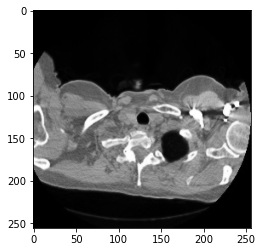

In [12]:
plt.imshow(test_images[0])

In [13]:
# Encode labels from text to integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [14]:
# Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [15]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One hot encode y values for neural network. 
# from keras.utils import to_categorical
# y_train_one_hot = to_categorical(y_train)
# y_test_one_hot = to_categorical(y_test)

In [16]:
# Load model without classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [17]:
# Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False

In [18]:
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
# Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

In [20]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [21]:
X_for_training = features #This is our X input to RF

In [22]:
# !pip install xgboost 

In [23]:
len(X_for_training[1])
X_for_training.shape

(1664, 32768)

In [24]:
# XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train) #For sklearn no one hot encoding

C:\Users\Reshma Dua\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [26]:
# Now predict using the trained RF model. 
prediction = model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

In [27]:
# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.9759615384615384


In [28]:
# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

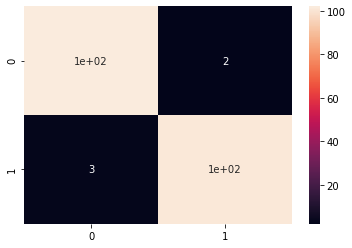

In [29]:
cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

       No PE       0.97      0.98      0.98       104
          PE       0.98      0.97      0.98       104

    accuracy                           0.98       208
   macro avg       0.98      0.98      0.98       208
weighted avg       0.98      0.98      0.98       208



The prediction for this image is:  ['No PE']
The actual label for this image is:  No PE


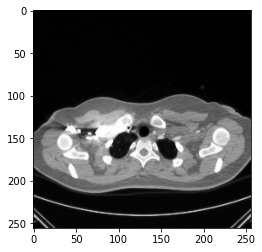

In [31]:
# Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])